In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deprem1999yeni/deprem1999-yeni.csv


In [48]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime
from scipy.stats import norm,skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [49]:
data2=pd.read_csv("/kaggle/input/deprem1999yeni/deprem1999-yeni.csv")

In [50]:
data2 = data2.drop(['Unnamed: 0'], axis=1)

In [51]:
data2['olus_tarihi2']= pd.to_datetime(data2["olus_tarihi"])

In [52]:
data2.head()

,olus_tarihi,enlem,boylam,Der(km),Yer,olus_tarihi2,floatedData,magnitude
0,2020.08.29,396762,278122,5.5,KALAYCILAR- (BALIKESIR) [North East 2.2 km],2020-08-29,2020.658470,3.7
1,2020.08.26,355632,316060,5.0,AKDENIZ,2020-08-26,2020.650273,3.6
2,2020.08.24,390075,358543,5.0,PALAS-SARIOGLAN (KAYSERI) [South West 2.5 km],2020-08-24,2020.644809,3.4
3,2020.08.23,381787,386887,8.2,KORME-PUTURGE (MALATYA) [North West 0.6 km],2020-08-23,2020.642077,4.1
4,2020.08.21,390807,276843,7.5,BAKIR-KIRKAGAC (MANISA) [West 1.7 km],2020-08-21,2020.636612,3.5


In [53]:
data2.shape

(8691, 8)

In [54]:
data = data2.drop(data2[data2['boylam'] <= 380000].index)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911 entries, 3 to 8685
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   olus_tarihi   2911 non-null   object        
 1   enlem         2911 non-null   int64         
 2   boylam        2911 non-null   int64         
 3   Der(km)       2911 non-null   float64       
 4   Yer           2911 non-null   object        
 5   olus_tarihi2  2911 non-null   datetime64[ns]
 6   floatedData   2911 non-null   float64       
 7   magnitude     662 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 204.7+ KB


Text(0.5, 0, 'olus_tarihi')

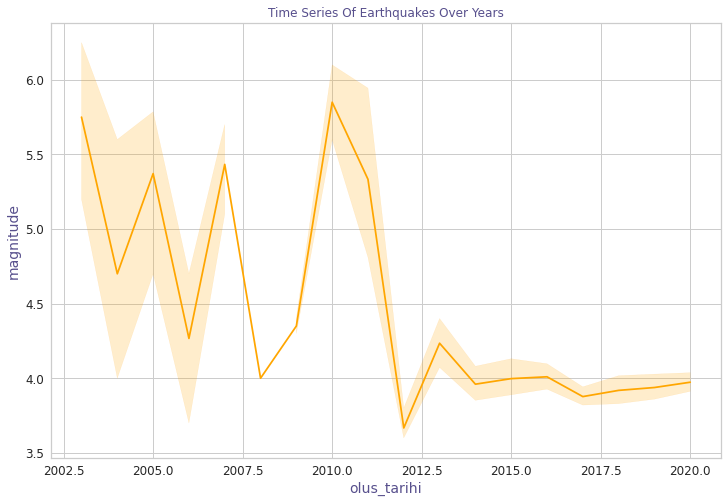

In [56]:
#plotting a lineplot with magnitudes with respectto dates
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['olus_tarihi2'].dt.year,y="magnitude",data=data, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("magnitude", color="#58508d")
Time_series.set_xlabel("olus_tarihi", color="#58508d")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


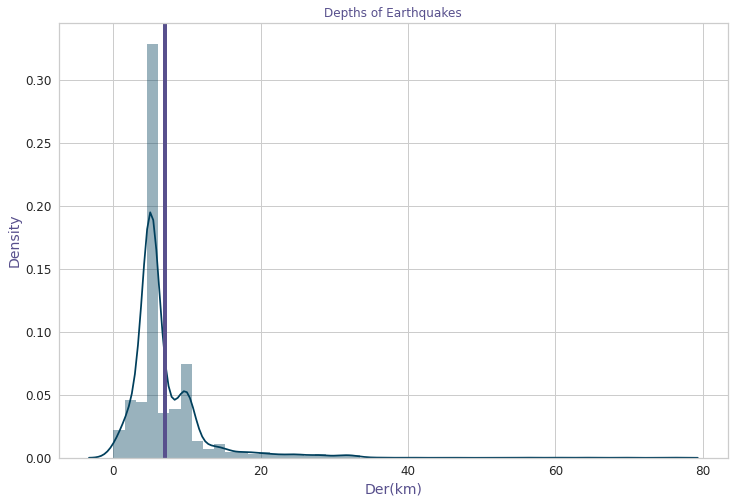

In [57]:
#Plotting the depth of earthquake and mean depth

plt.figure(figsize=(12,8))
depth = data["Der(km)"].values
mean_D= data["Der(km)"].mean()
Depth_plot = sns.distplot(depth, color ="#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color="#58508d")
Depth_plot.set_ylabel("Density", color="#58508d")
Depth_plot.set_xlabel("Der(km)", color="#58508d")

plt.axvline(mean_D,0,1, color="#58508d",linewidth=4,label="Mean")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


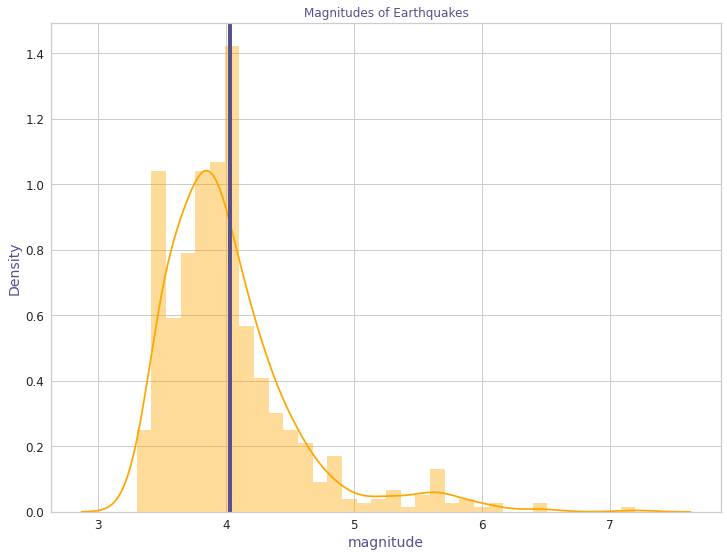

In [58]:
plt.figure(figsize=(12,9))
strength = data["magnitude"].values
mean_M= data["magnitude"].mean()
Magnitude_plot = sns.distplot(strength, color ="#ffa600")
Magnitude_plot.set_title("Magnitudes of Earthquakes", color="#58508d")
Magnitude_plot.set_ylabel("Density", color="#58508d")
Magnitude_plot.set_xlabel("magnitude", color="#58508d")

plt.axvline(mean_M,0,1, color="#58508d",linewidth=4,label="Mean")

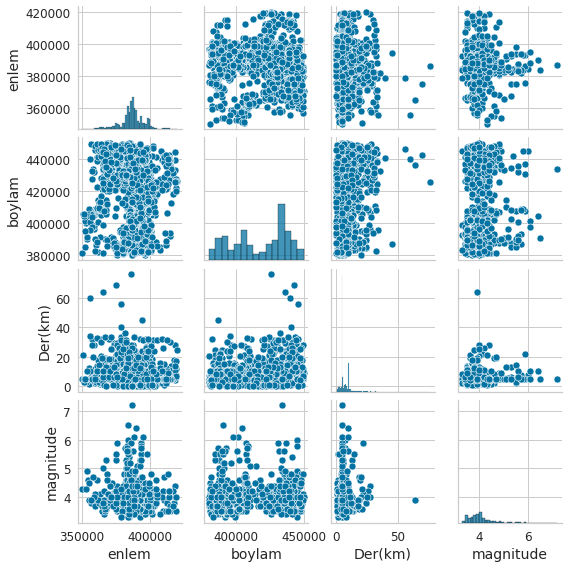

In [59]:
cols=['enlem','boylam','Der(km)', 'magnitude']
sns.pairplot(data[cols],height = 2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

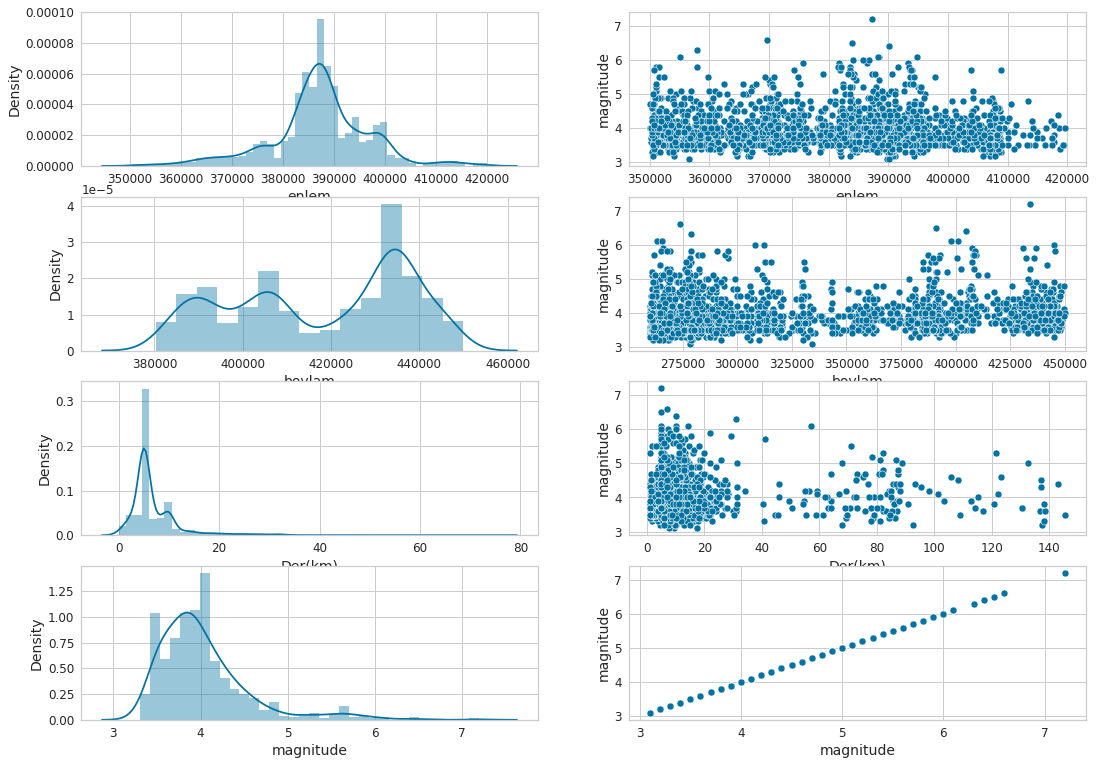

In [60]:
plt.figure(figsize=(18,30))
for idx, f in enumerate(['enlem','boylam','Der(km)', 'magnitude']):
    plt.subplot(9,2,2*idx+1)
    sns.distplot(data[f])
    plt.subplot(9,2,2*idx+2)
    sns.scatterplot(x=f,y='magnitude',data =data2)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


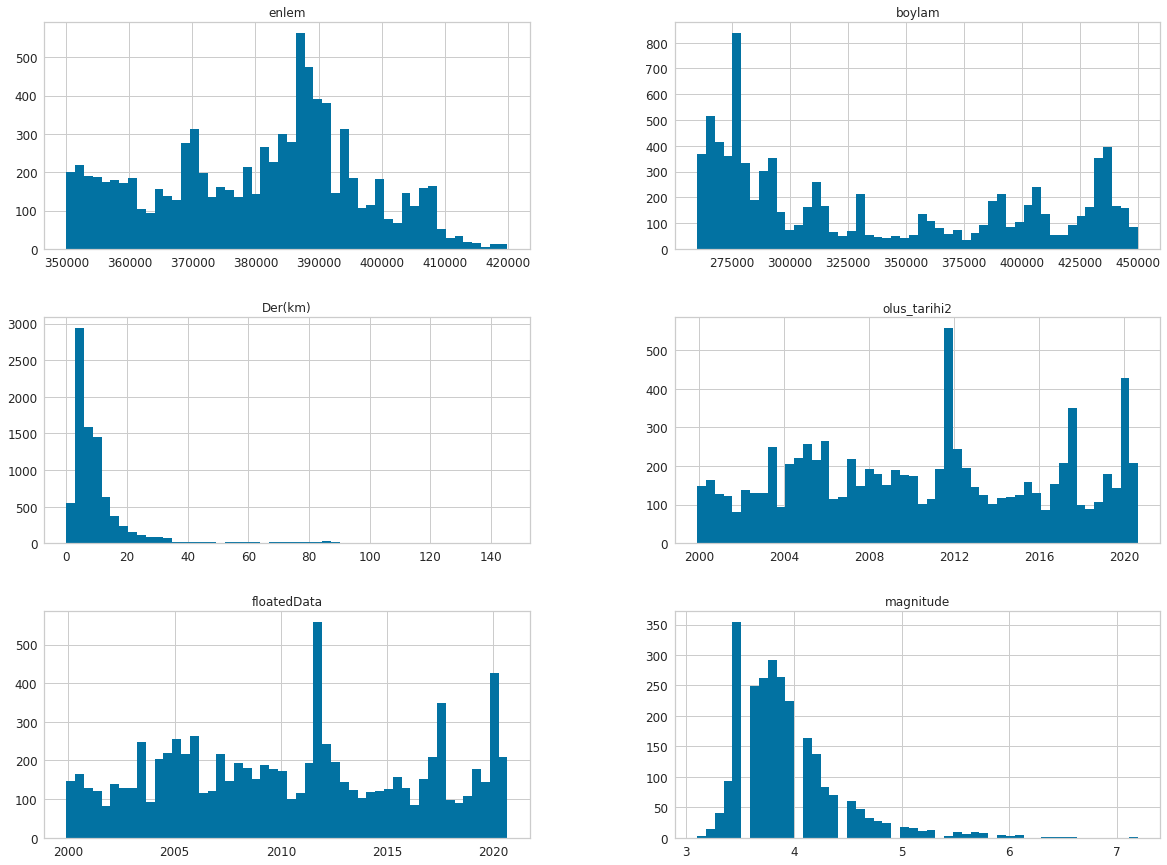

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
data2.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='enlem', ylabel='enlem'>,
        <AxesSubplot:xlabel='boylam', ylabel='enlem'>,
        <AxesSubplot:xlabel='Der(km)', ylabel='enlem'>,
        <AxesSubplot:xlabel='floatedData', ylabel='enlem'>,
        <AxesSubplot:xlabel='magnitude', ylabel='enlem'>],
       [<AxesSubplot:xlabel='enlem', ylabel='boylam'>,
        <AxesSubplot:xlabel='boylam', ylabel='boylam'>,
        <AxesSubplot:xlabel='Der(km)', ylabel='boylam'>,
        <AxesSubplot:xlabel='floatedData', ylabel='boylam'>,
        <AxesSubplot:xlabel='magnitude', ylabel='boylam'>],
       [<AxesSubplot:xlabel='enlem', ylabel='Der(km)'>,
        <AxesSubplot:xlabel='boylam', ylabel='Der(km)'>,
        <AxesSubplot:xlabel='Der(km)', ylabel='Der(km)'>,
        <AxesSubplot:xlabel='floatedData', ylabel='Der(km)'>,
        <AxesSubplot:xlabel='magnitude', ylabel='Der(km)'>],
       [<AxesSubplot:xlabel='enlem', ylabel='floatedData'>,
        <AxesSubplot:xlabel='boylam', ylabel='floatedData'>,
        <Axe

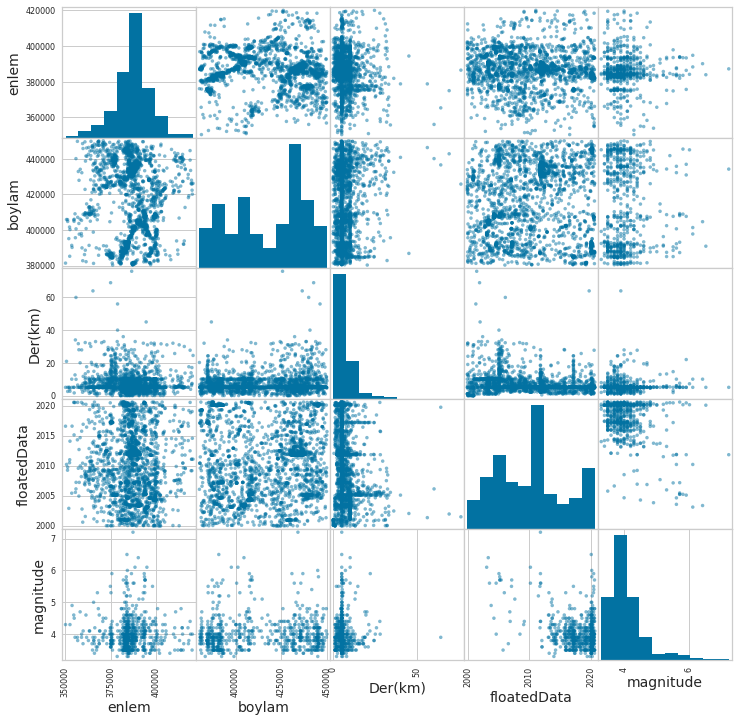

In [62]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(12, 12))

Text(0.5, 1.0, 'Correlation between different fearures')

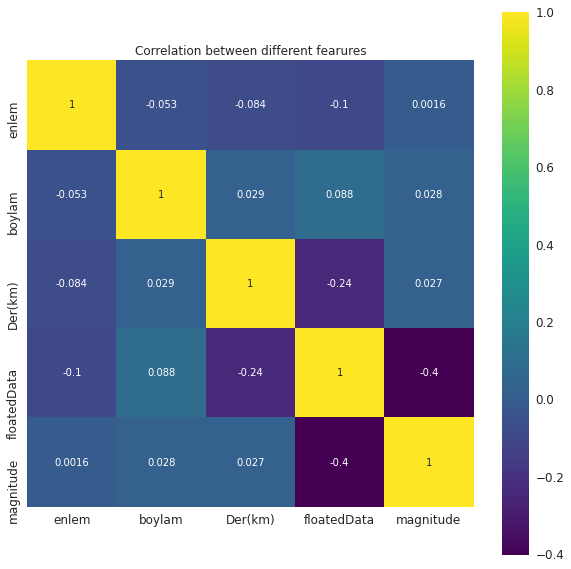

In [63]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

**Kmeans enlem-boylam**

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


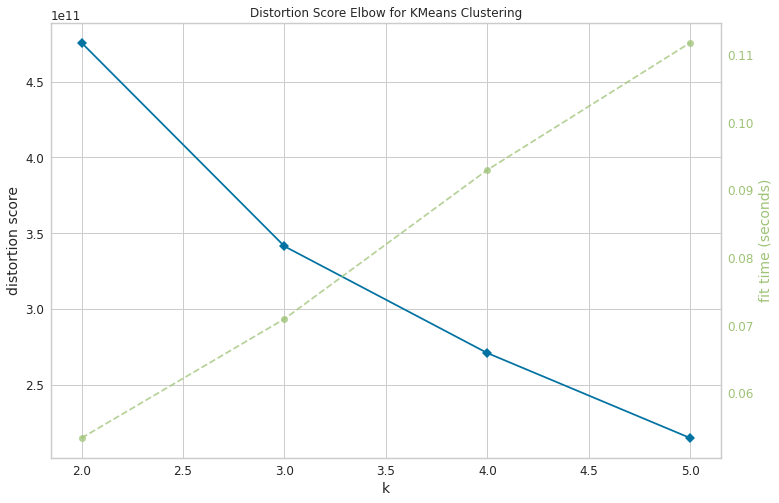

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
data.head()

X = data[["boylam", "enlem"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [65]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)

KMeans(n_clusters=4)

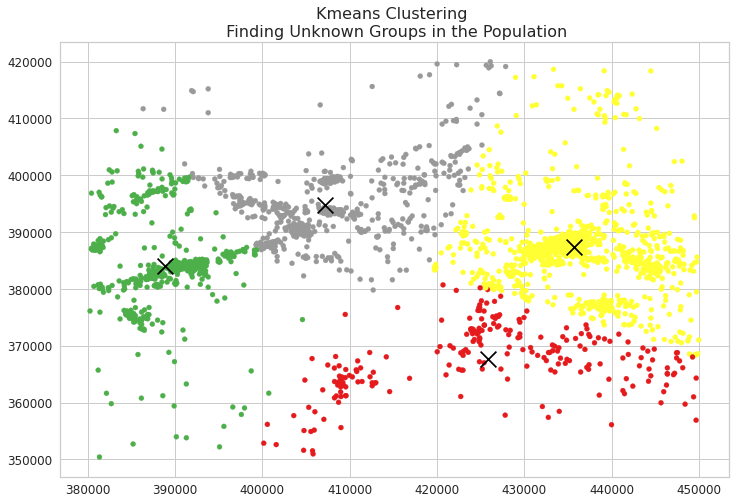

In [66]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

In [92]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

    
for index, row in data.iterrows():
    folium.CircleMarker(location=[((row["enlem"]-(row["enlem"]/10000))/10000), ((row["boylam"]-(row["boylam"]/10000))/10000)], radius=0.3, color='purple',).add_to(n)


folium.CircleMarker(location=[38.5, 39], radius=5, color='blue',).add_to(n)
folium.CircleMarker(location=[39.5, 40.7], radius=5, color='blue',).add_to(n)
folium.CircleMarker(location=[36.5, 42.5], radius=5, color='blue',).add_to(n)
folium.CircleMarker(location=[38.5, 43.5], radius=5, color='blue',).add_to(n)

n

**Silhouette enlem-boylam**

In [68]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [69]:
data.head(1)

,olus_tarihi,enlem,boylam,Der(km),Yer,olus_tarihi2,floatedData,magnitude
3,2020.08.23,381787,386887,8.2,KORME-PUTURGE (MALATYA) [North West 0.6 km],2020-08-23,2020.642077,4.1


In [70]:
# selecting features
x = data.iloc[:,[1,2]].values

For n_clusters = 2 The average silhouette_score is : 0.5968369615967111
For n_clusters = 3 The average silhouette_score is : 0.5295642846212588
For n_clusters = 4 The average silhouette_score is : 0.47138158788248224
For n_clusters = 5 The average silhouette_score is : 0.5058031822268733
For n_clusters = 6 The average silhouette_score is : 0.49975126918064616
For n_clusters = 7 The average silhouette_score is : 0.4838829987788641
For n_clusters = 8 The average silhouette_score is : 0.48395361633547607
For n_clusters = 9 The average silhouette_score is : 0.4996286433969955
For n_clusters = 10 The average silhouette_score is : 0.5089143888507344


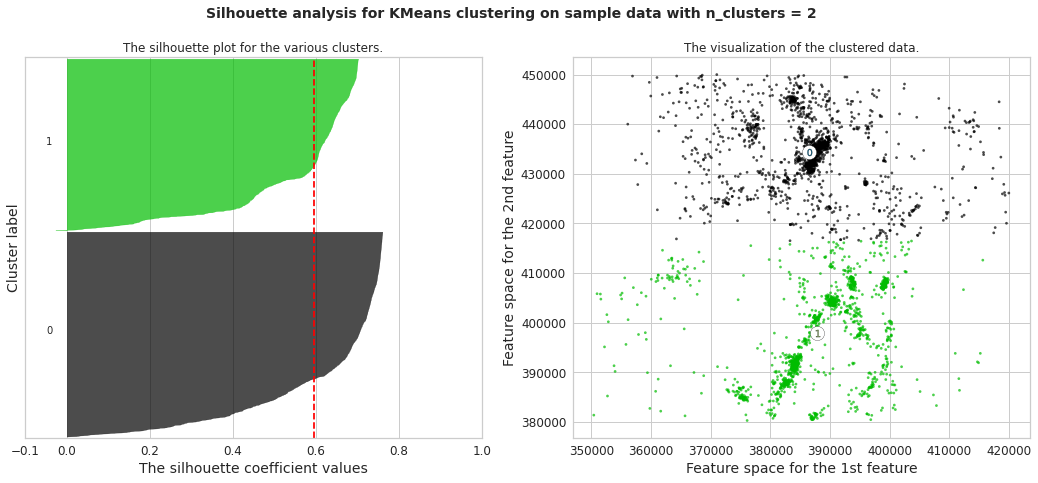

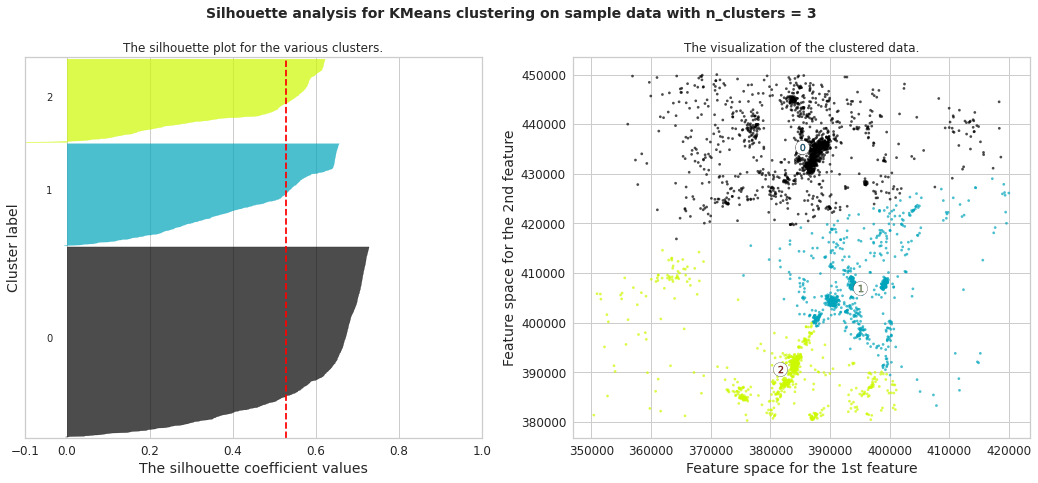

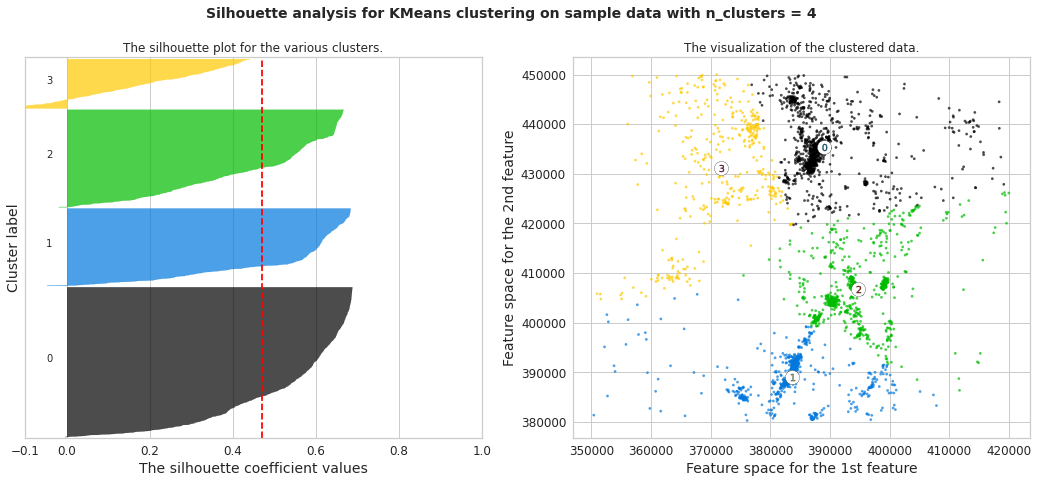

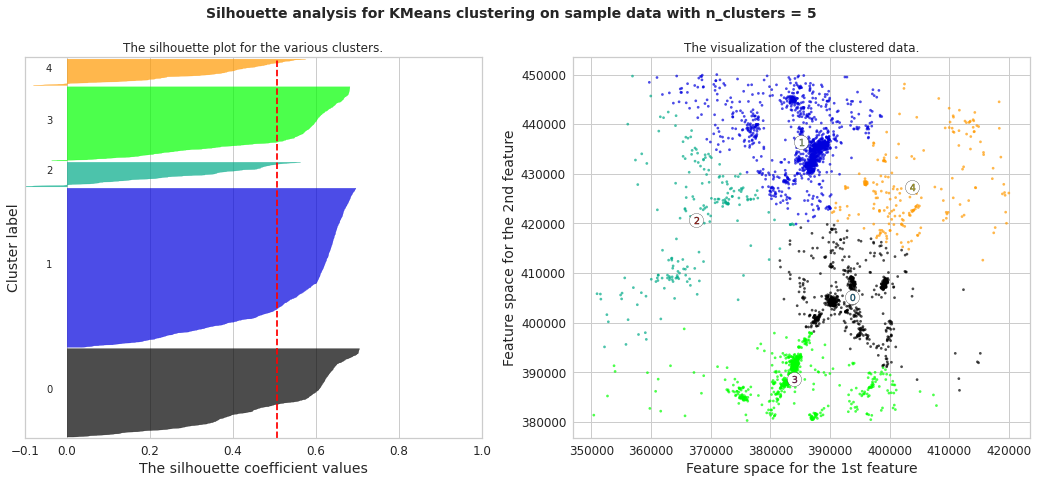

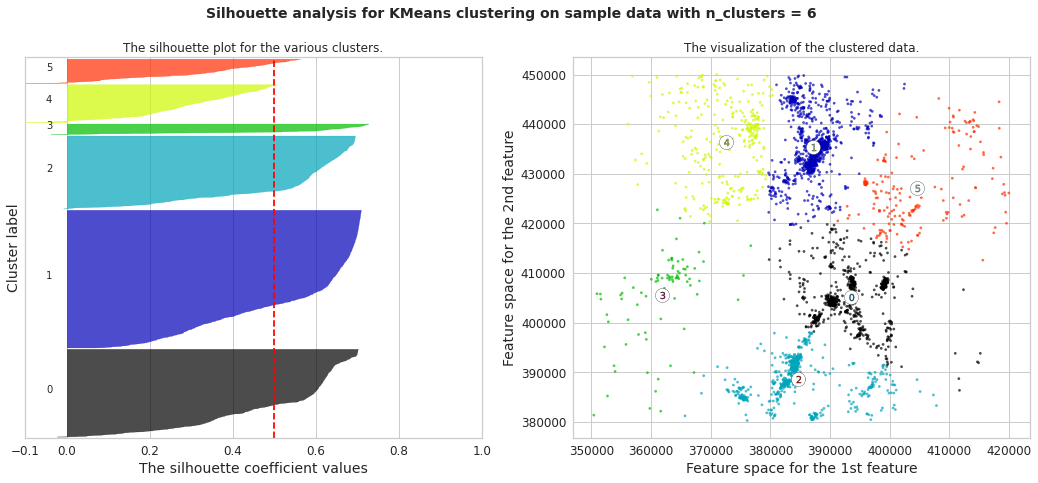

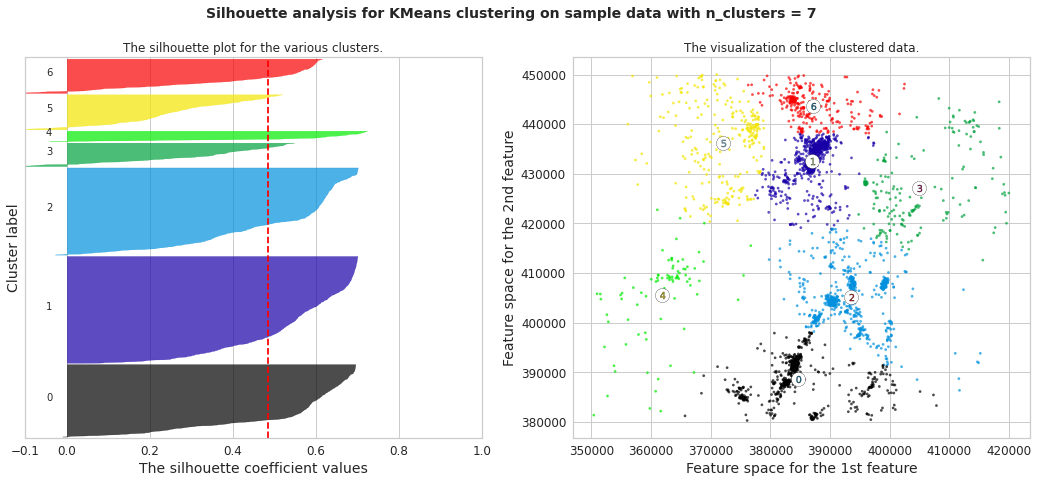

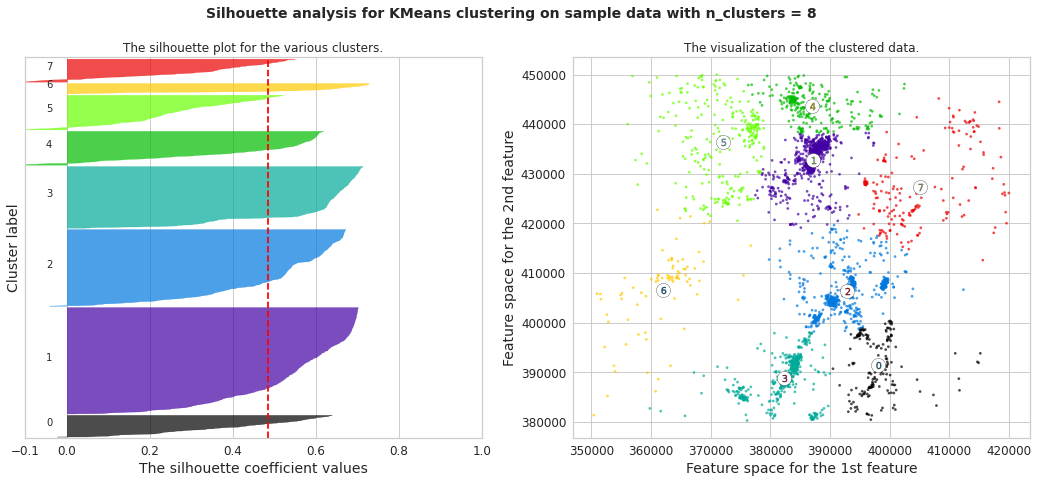

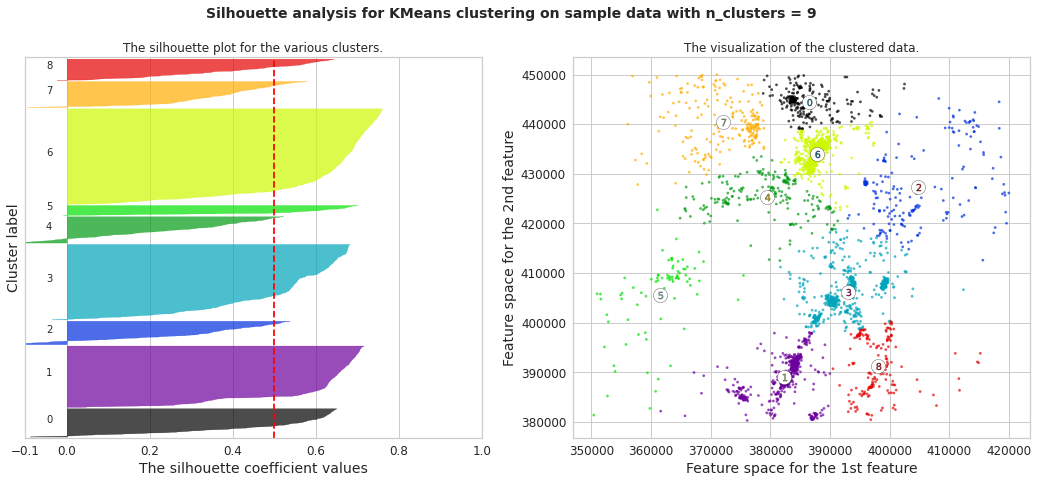

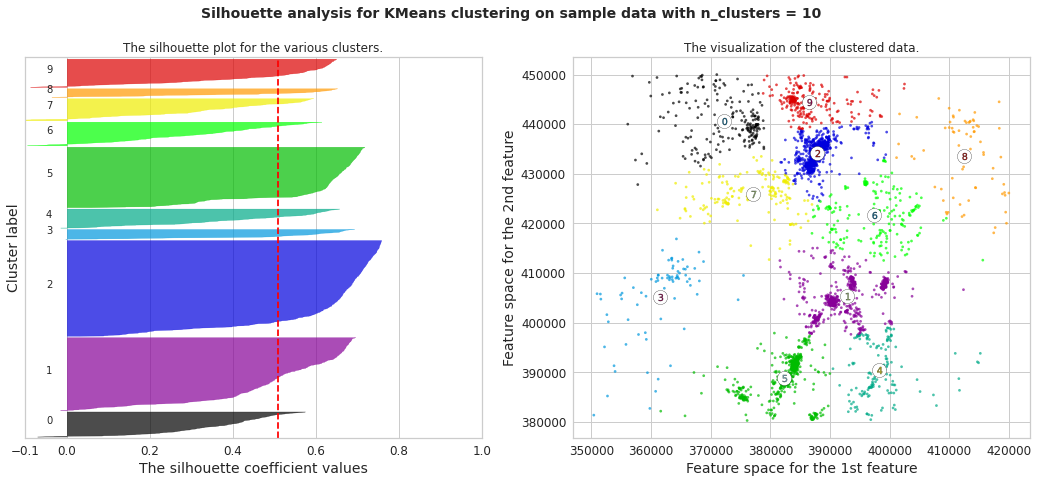

In [71]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**DBSCAN enlem-boylam**

In [72]:
x=data.iloc[:,[1,2]].values

In [73]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [74]:
model=db.fit(x)

In [75]:
label=model.labels_

In [76]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 0


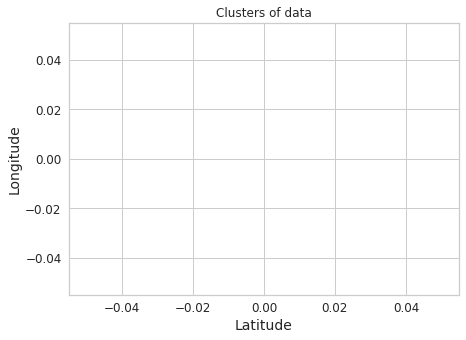

In [77]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters of data')
plt.show()

**Kmeans magnitude-depth**

In [78]:
data=data.dropna()

In [79]:
data.shape

(662, 8)

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


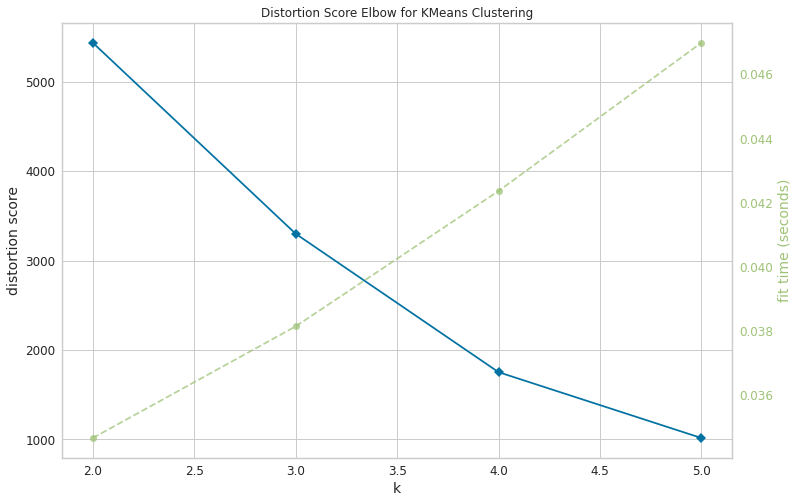

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
data.head()

X = data[["Der(km)", "magnitude"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [81]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)

KMeans(n_clusters=4)

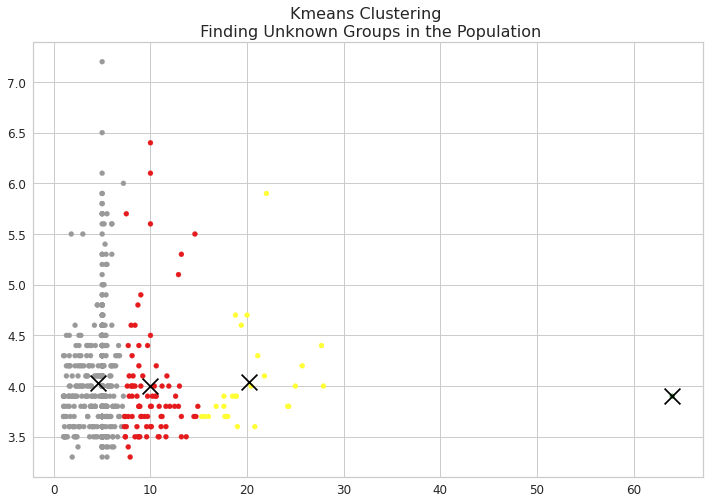

In [82]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

**Siluet der-buy**

In [83]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [84]:
# selecting features
x = data.iloc[:,[3,7]].values

For n_clusters = 2 The average silhouette_score is : 0.811052301421199
For n_clusters = 3 The average silhouette_score is : 0.7842167915738811
For n_clusters = 4 The average silhouette_score is : 0.6859635783761577
For n_clusters = 5 The average silhouette_score is : 0.6483939907143298
For n_clusters = 6 The average silhouette_score is : 0.6503858430534141
For n_clusters = 7 The average silhouette_score is : 0.6533956694495857
For n_clusters = 8 The average silhouette_score is : 0.593632188764586
For n_clusters = 9 The average silhouette_score is : 0.4971335931623586
For n_clusters = 10 The average silhouette_score is : 0.5074506876635426


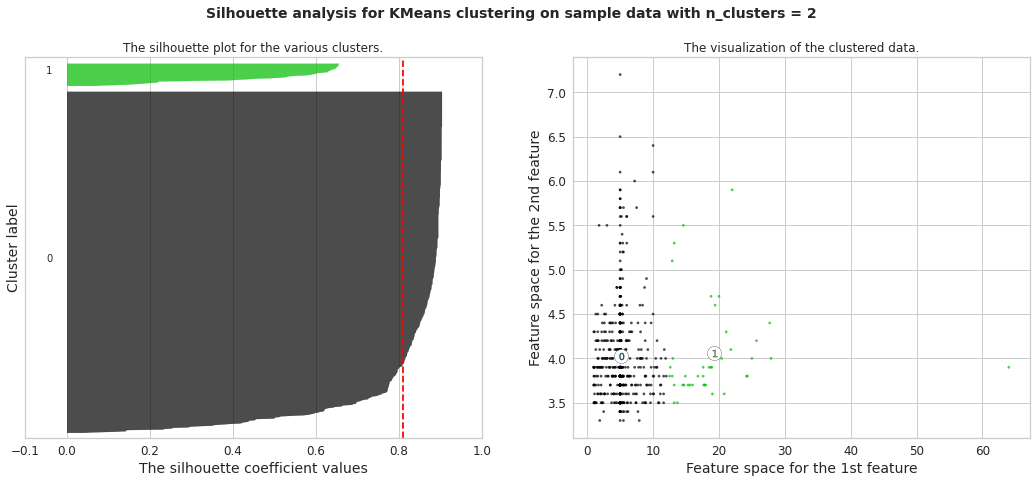

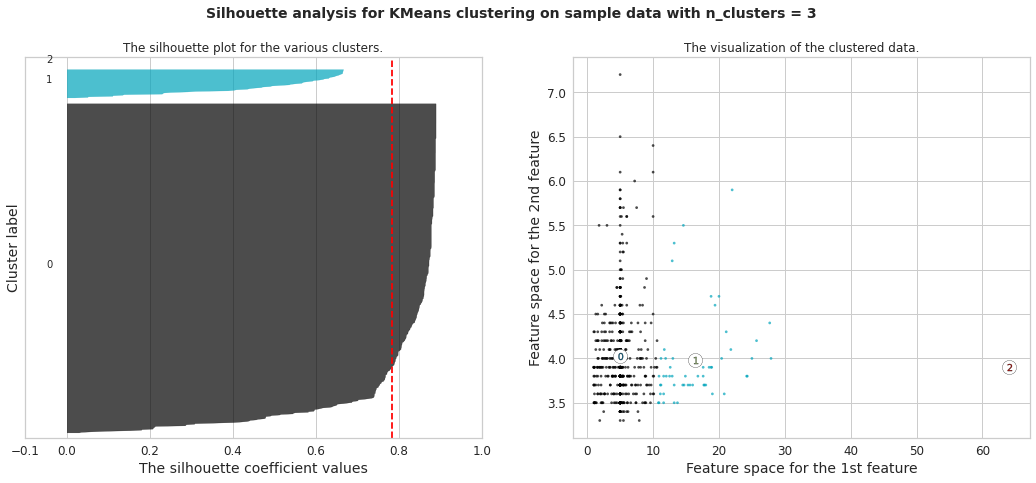

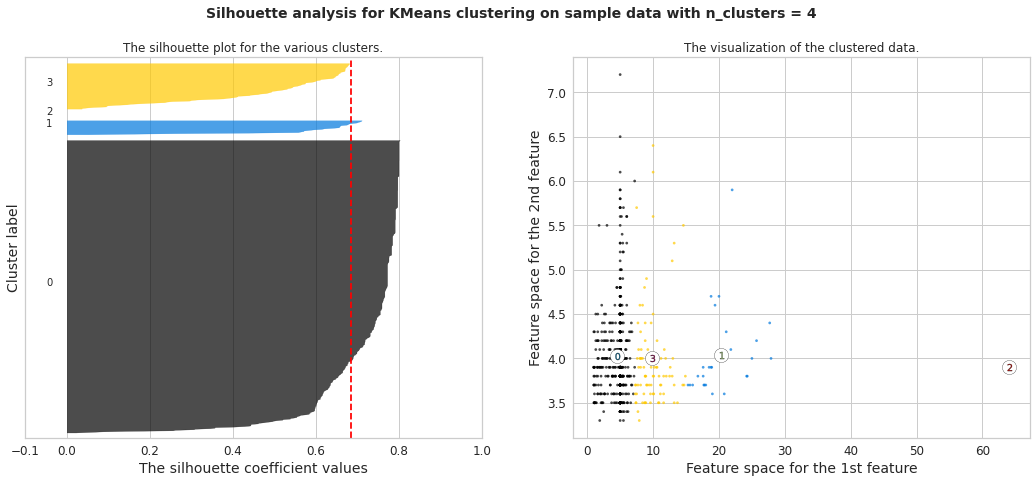

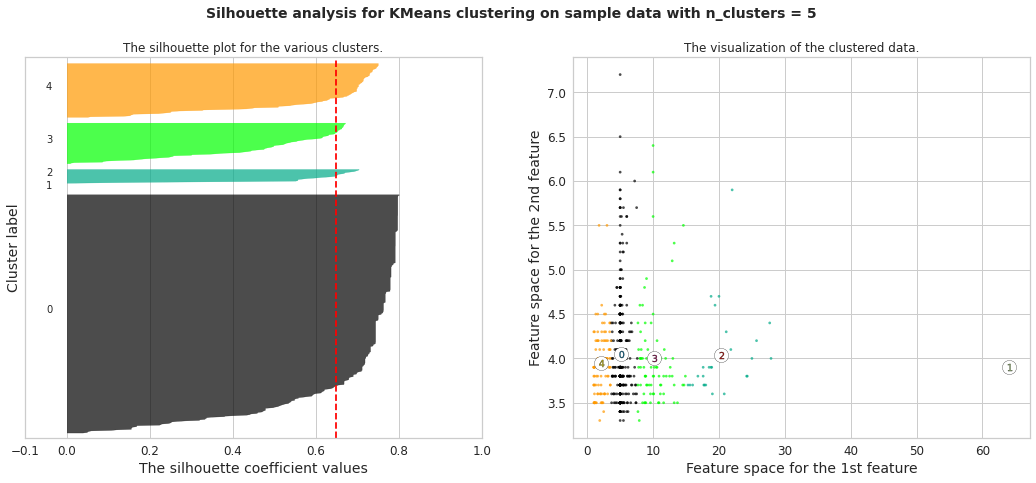

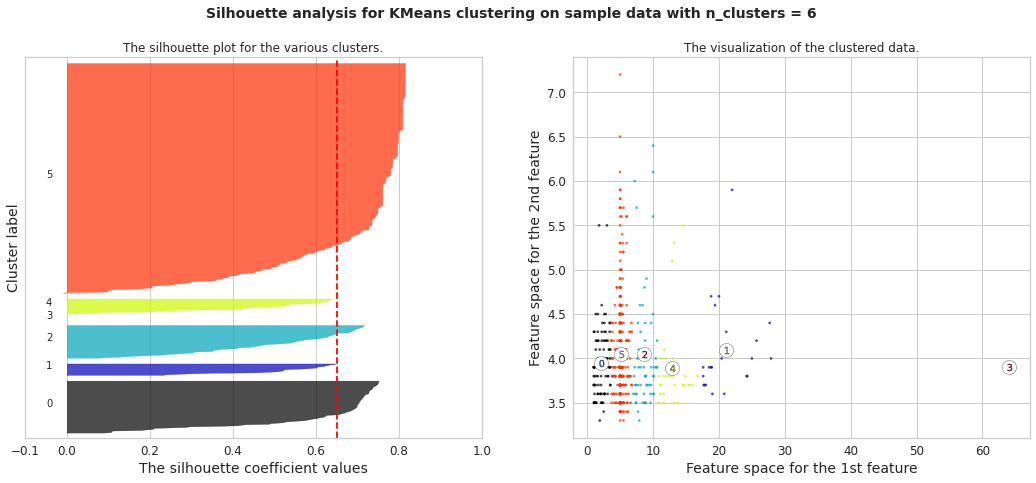

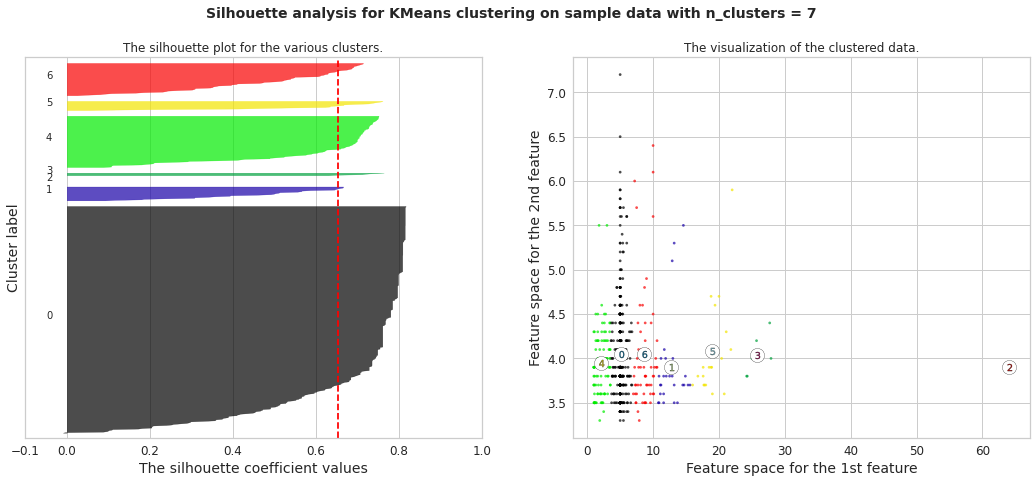

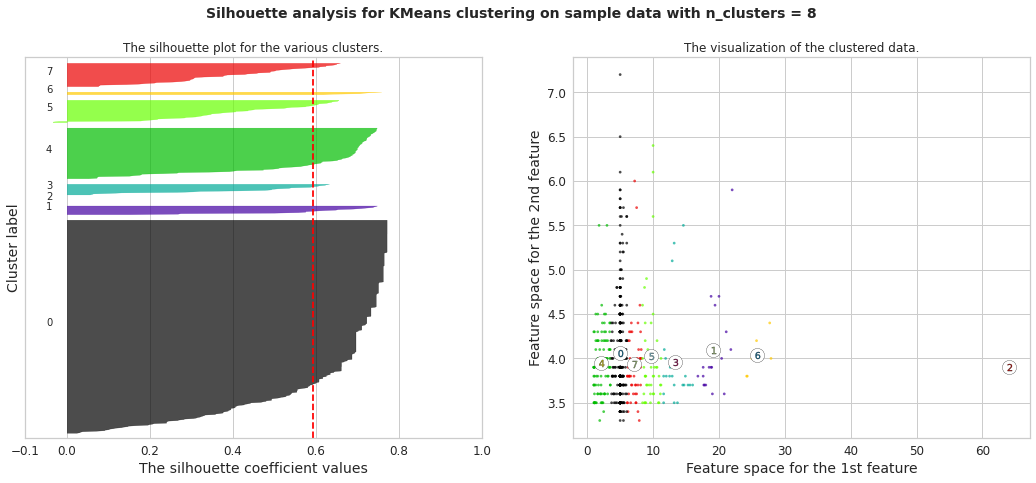

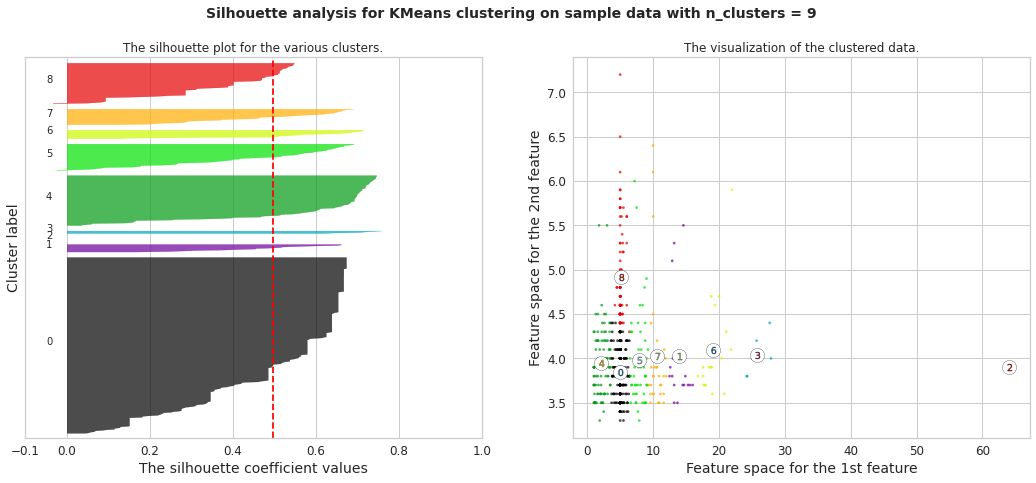

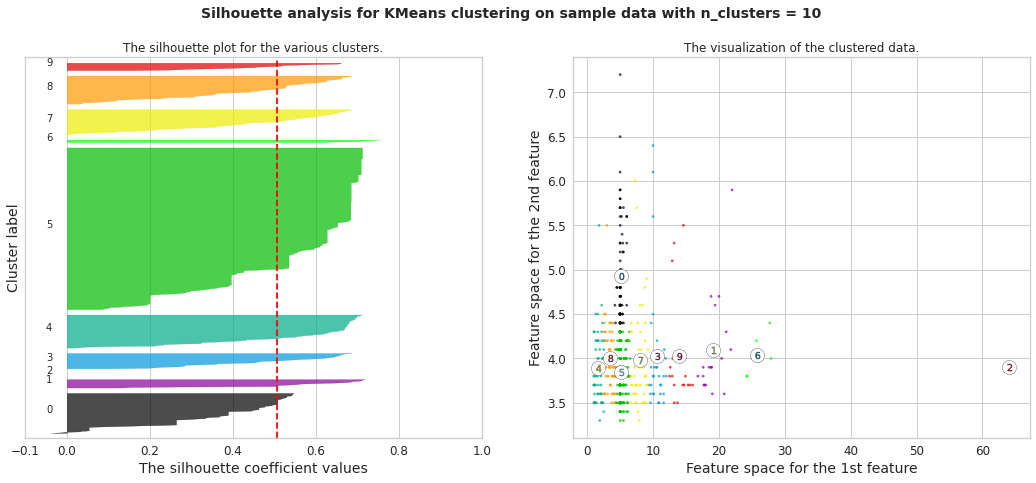

In [85]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**dbscan der-buy**

In [86]:
x=data.iloc[:,[3,7]].values

In [87]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [88]:
model=db.fit(x)

In [89]:
label=model.labels_

In [90]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 1


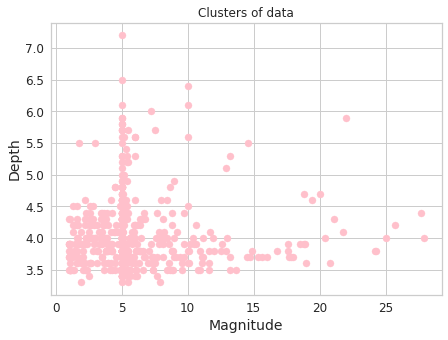

In [91]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.title('Clusters of data')
plt.show()